In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [106]:
df = pd.read_csv("creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [48]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [49]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [50]:
non_fraud = df[df.Class == 0]
fraud = df[df.Class == 1]

In [51]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [52]:
non_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [53]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


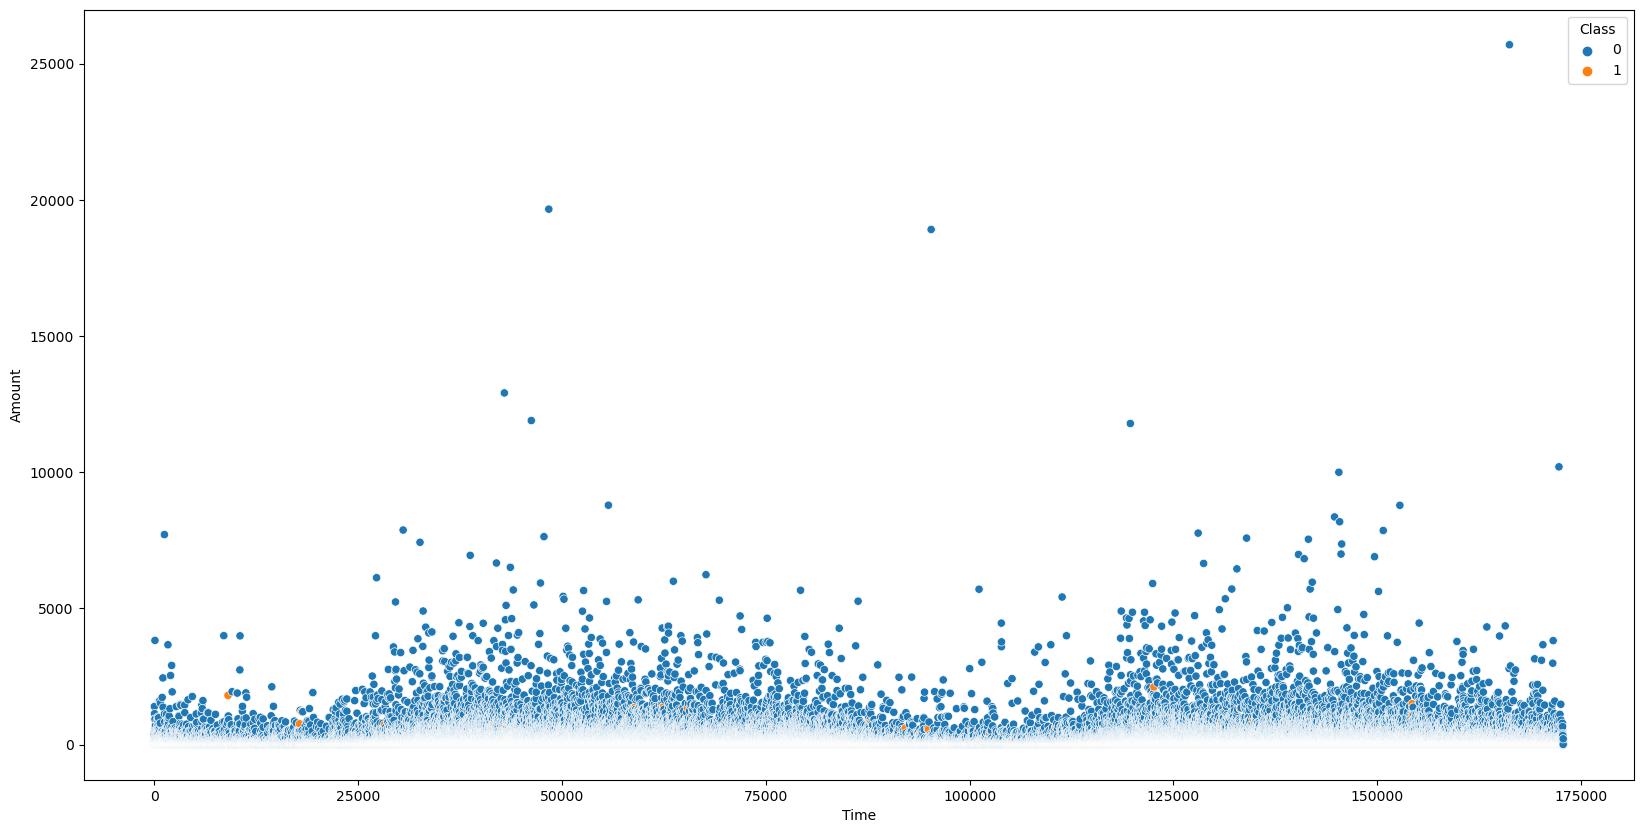

In [54]:
sns.scatterplot(data=df, x='Time', y='Amount',hue='Class')
plt.show()

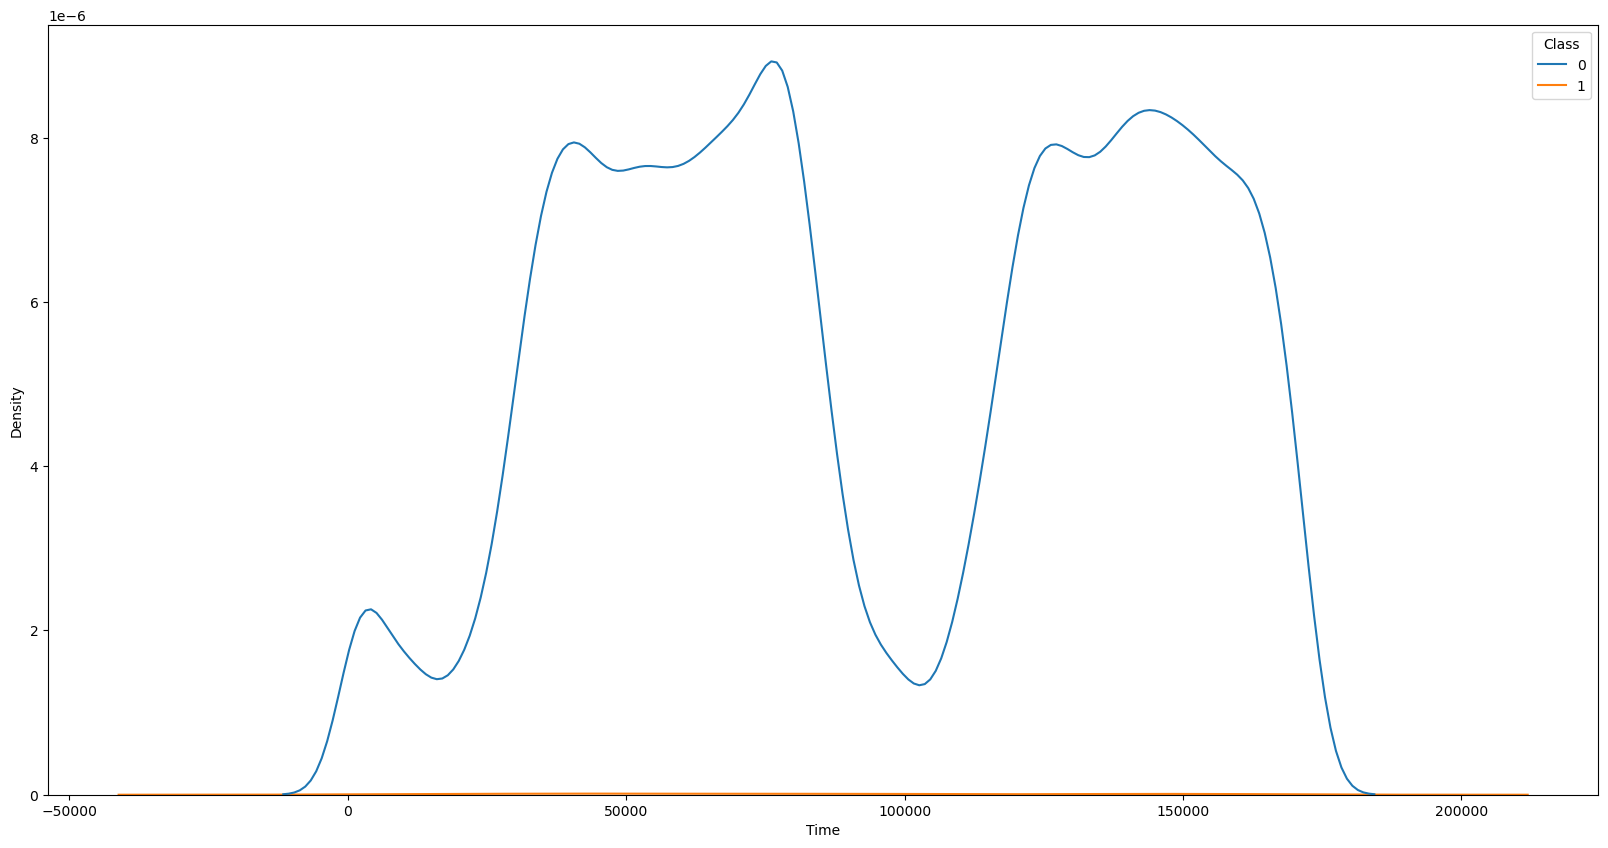

In [55]:
sns.kdeplot(data=df, x='Time',hue='Class')
plt.show()

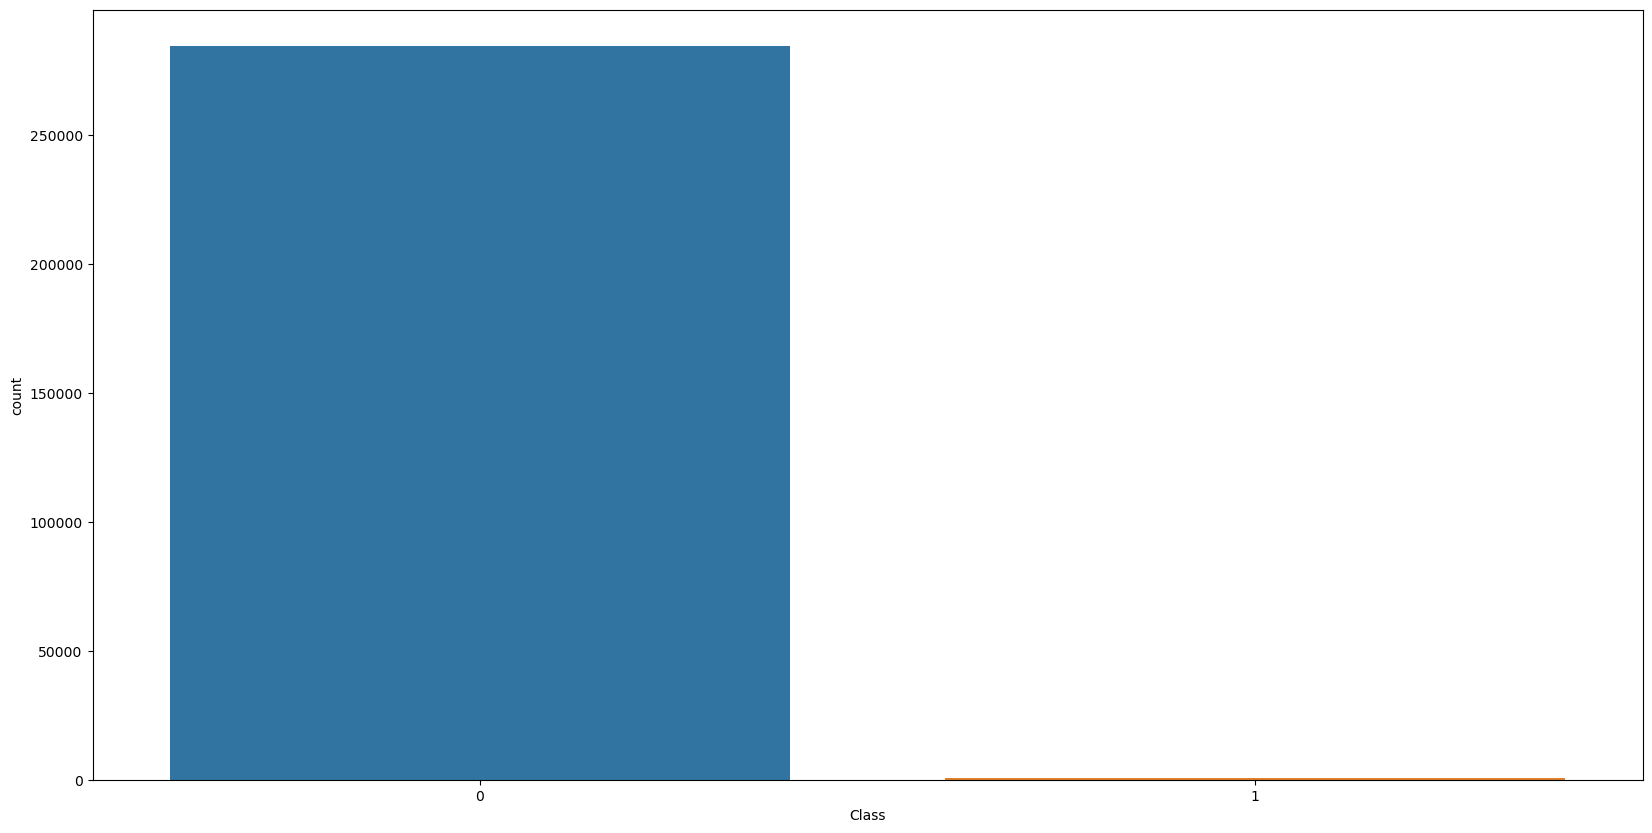

In [56]:
sns.countplot(x='Class', data=df)
plt.show()

<Axes: >

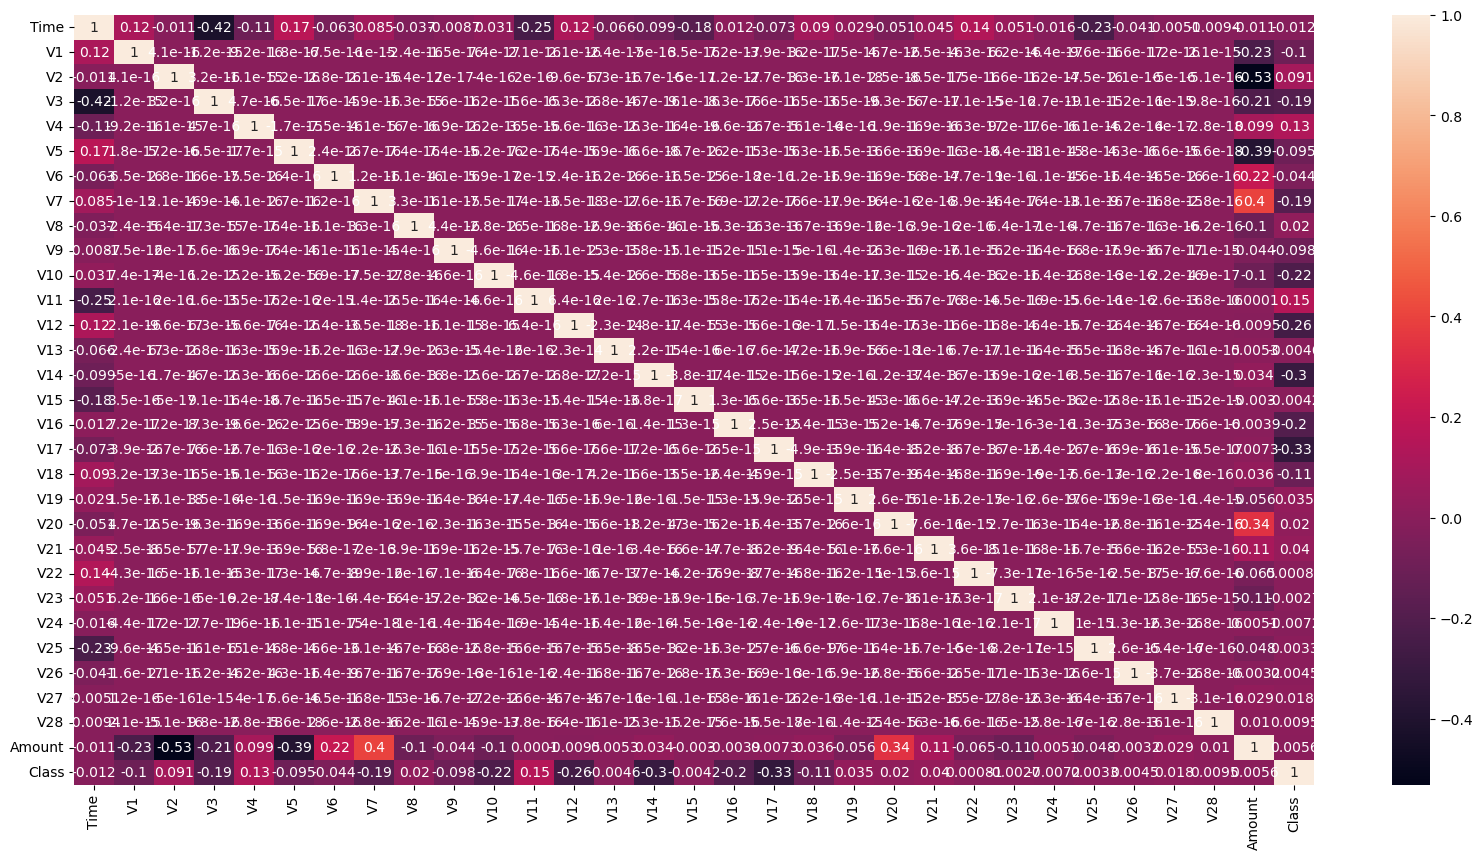

In [57]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.heatmap(df.corr(), annot=True)

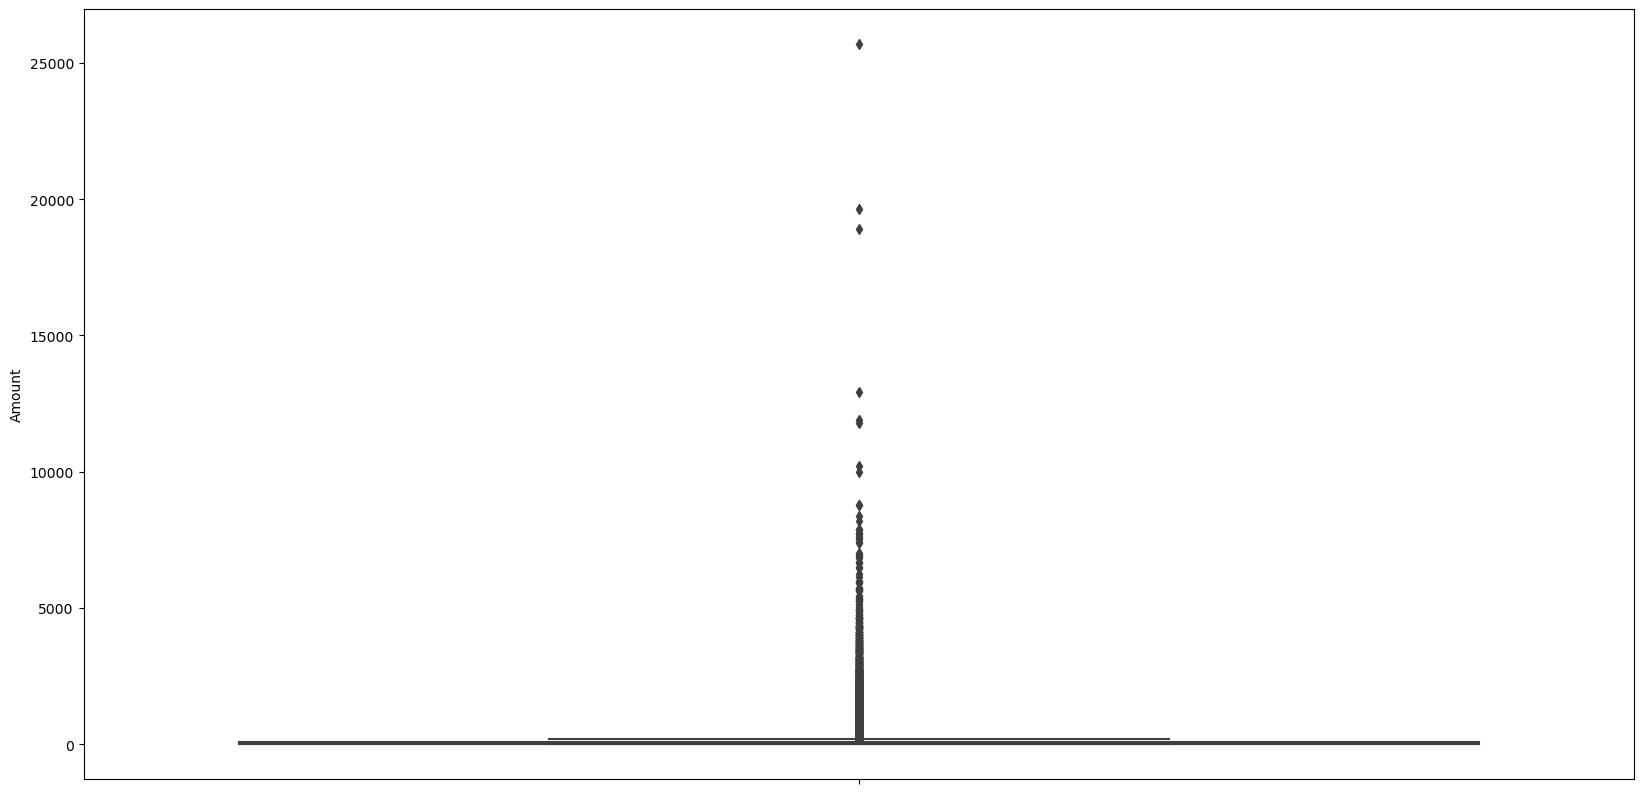

In [58]:
sns.boxplot(data=df, y='Amount')
plt.show()

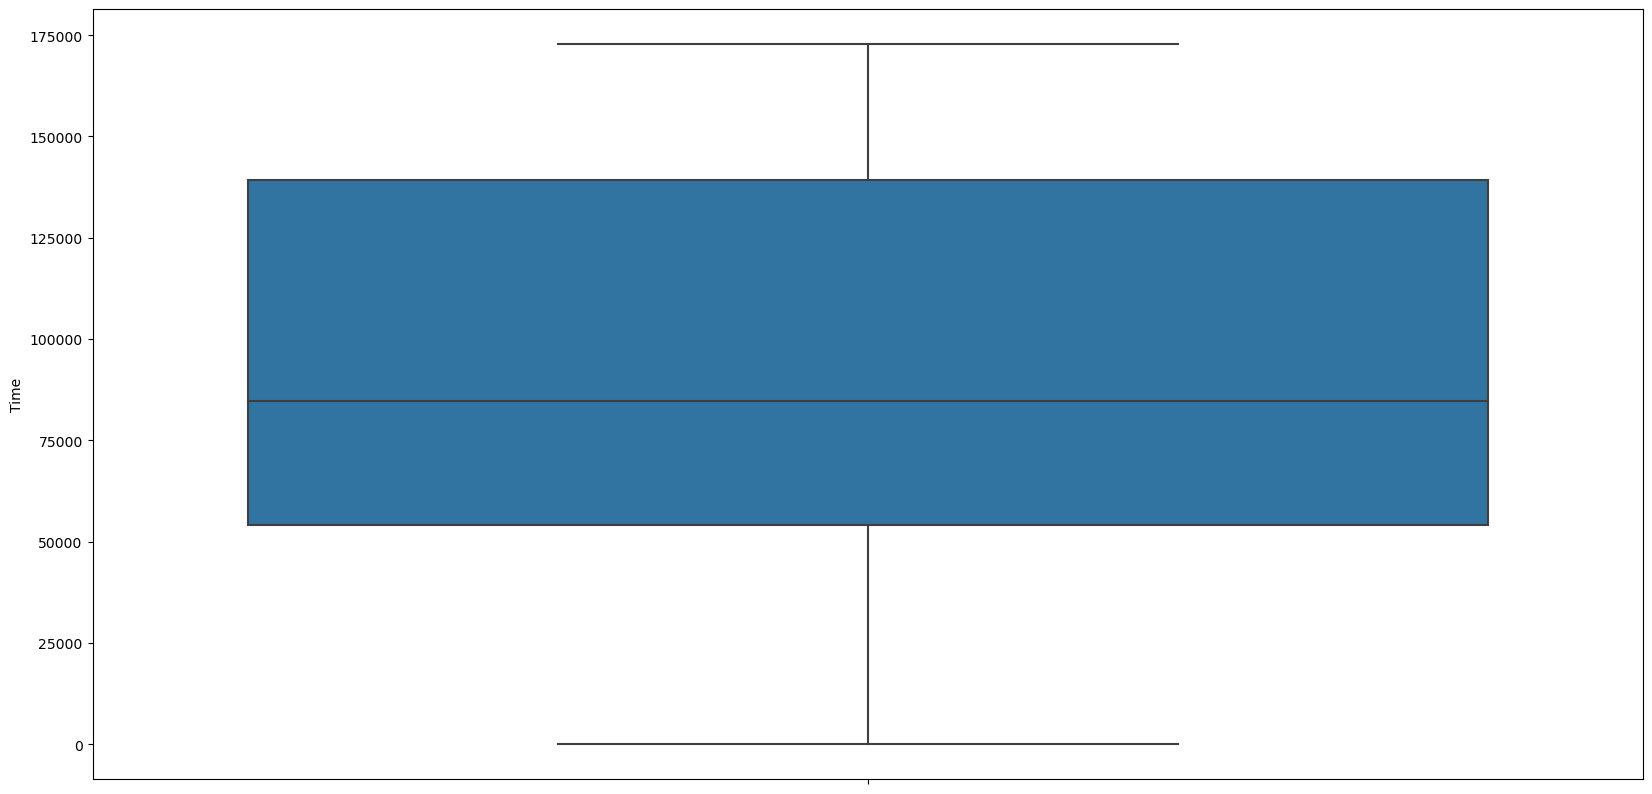

In [59]:
sns.boxplot(data=df, y='Time')
plt.show()

In [60]:
#undersamoling the data
non_fraud_sample = non_fraud.sample(n=492)
under_sample_df = pd.concat([non_fraud_sample, fraud], axis=0)
under_sample_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
12541,21951.0,1.291349,-0.482646,0.577788,-0.205109,-0.871331,-0.534071,-0.534048,-0.218865,0.640171,...,-0.025530,0.289420,-0.053068,0.414856,0.560812,-0.180269,-0.004483,0.008012,36.00,0
253887,156479.0,1.891655,0.095379,-1.643851,1.437079,0.468883,-1.094005,0.825077,-0.510188,0.001579,...,0.107774,0.440350,-0.079965,0.030680,0.474707,-0.501332,-0.019866,-0.046869,80.00,0
220940,142364.0,1.829172,-0.574930,-0.334911,0.468296,-0.141471,1.046528,-0.850182,0.379846,1.179640,...,0.259335,1.083316,0.219690,-1.060396,-0.449760,0.488287,0.048399,-0.053707,20.50,0
172716,121213.0,2.081103,0.222684,-1.706350,0.395958,0.519626,-0.830356,0.242120,-0.282208,0.366445,...,-0.358692,-0.883006,0.323563,0.505665,-0.221316,0.172154,-0.056933,-0.029283,0.89,0
262374,160443.0,1.738451,-0.788530,-0.775749,0.137509,-0.448828,-0.184771,-0.216700,-0.008036,1.045636,...,-0.304086,-0.992044,0.256301,-0.517961,-0.497423,-0.417756,-0.026340,-0.031191,138.98,0


In [61]:
under_sample_df["Class"].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [62]:
x = under_sample_df.drop(["Class"], axis=1)
y = under_sample_df["Class"]

In [63]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
12541,21951.0,1.291349,-0.482646,0.577788,-0.205109,-0.871331,-0.534071,-0.534048,-0.218865,0.640171,...,0.052302,-0.025530,0.289420,-0.053068,0.414856,0.560812,-0.180269,-0.004483,0.008012,36.00
253887,156479.0,1.891655,0.095379,-1.643851,1.437079,0.468883,-1.094005,0.825077,-0.510188,0.001579,...,-0.075254,0.107774,0.440350,-0.079965,0.030680,0.474707,-0.501332,-0.019866,-0.046869,80.00
220940,142364.0,1.829172,-0.574930,-0.334911,0.468296,-0.141471,1.046528,-0.850182,0.379846,1.179640,...,-0.253989,0.259335,1.083316,0.219690,-1.060396,-0.449760,0.488287,0.048399,-0.053707,20.50
172716,121213.0,2.081103,0.222684,-1.706350,0.395958,0.519626,-0.830356,0.242120,-0.282208,0.366445,...,-0.100437,-0.358692,-0.883006,0.323563,0.505665,-0.221316,0.172154,-0.056933,-0.029283,0.89
262374,160443.0,1.738451,-0.788530,-0.775749,0.137509,-0.448828,-0.184771,-0.216700,-0.008036,1.045636,...,0.085166,-0.304086,-0.992044,0.256301,-0.517961,-0.497423,-0.417756,-0.026340,-0.031191,138.98


In [64]:
y.head()

12541     0
253887    0
220940    0
172716    0
262374    0
Name: Class, dtype: int64

In [65]:
#spliting into test and train data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (787, 30)
x_test: (197, 30)
y_train: (787,)
y_test: (197,)


In [103]:
#model training
#LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

#prediction on test data
y_pred1 = logisticRegr.predict(x_test)

In [105]:
from sklearn.metrics import f1_score
f1_score = f1_score(y_test ,y_pred1)
f1_score

0.9223300970873787

In [72]:
pre_score = precision_score(y_test ,y_pred1)
pre_score

0.95

In [94]:
recall_score = round(recall_score(y_test ,y_pred1),3)
recall_score

0.896

In [77]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred1)
print(cf_matrix)

[[86  5]
 [11 95]]


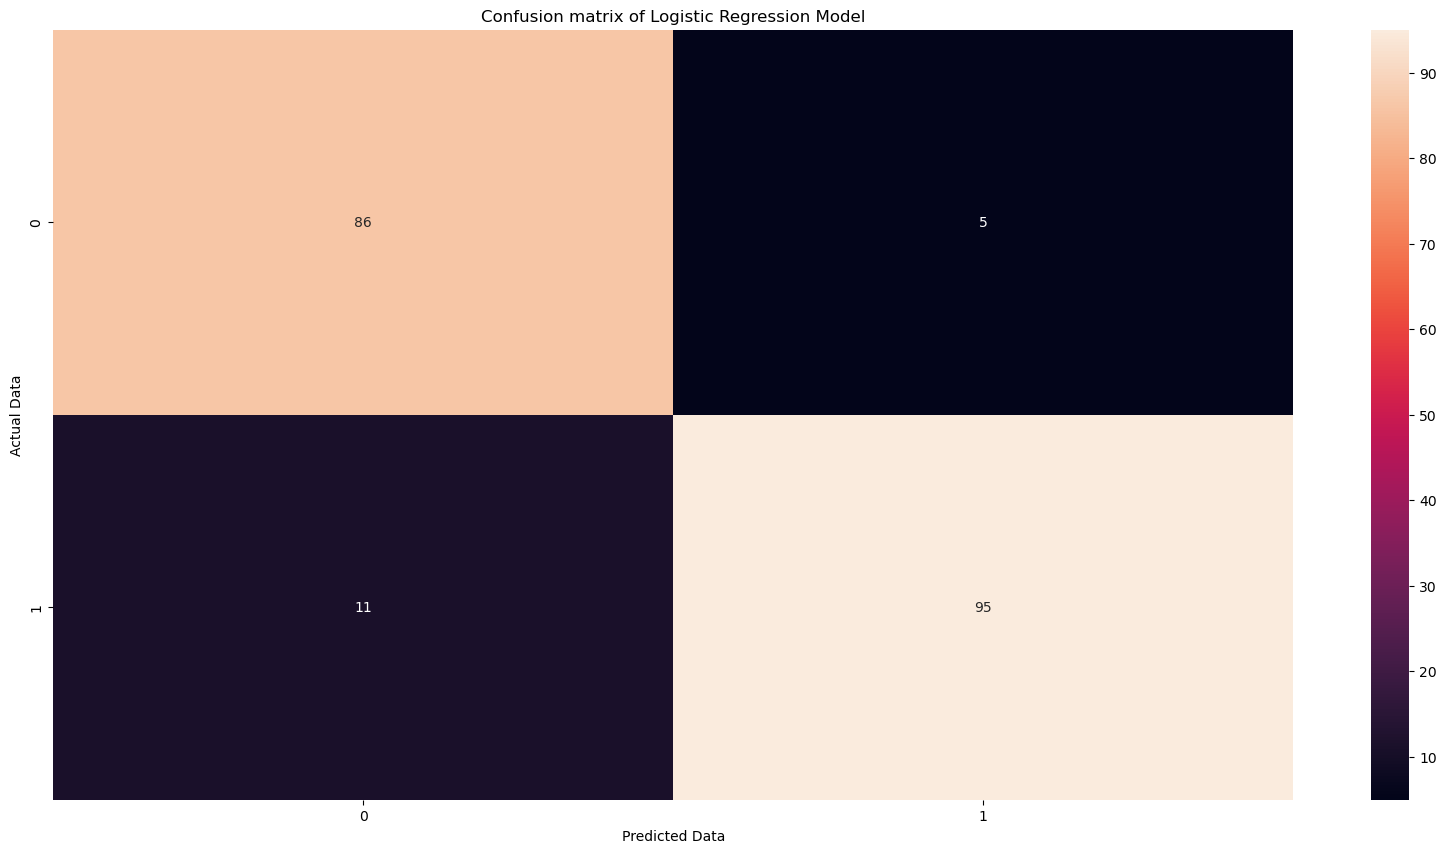

In [89]:
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion matrix of Logistic Regression Model")
plt.xlabel("Predicted Data")
plt.ylabel("Actual Data")
plt.show()

In [84]:
#model training
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

#prediction on test data
y_predr = random_forest.predict(x_test)

In [85]:
f1_score_r = f1_score(y_test ,y_predr)
f1_score_r

0.9313725490196079

In [86]:
pre_score_r = precision_score(y_test ,y_predr)
pre_score_r

0.9693877551020408

In [87]:
recall_score_r = recall_score(y_test ,y_predr)
recall_score_r

0.8962264150943396

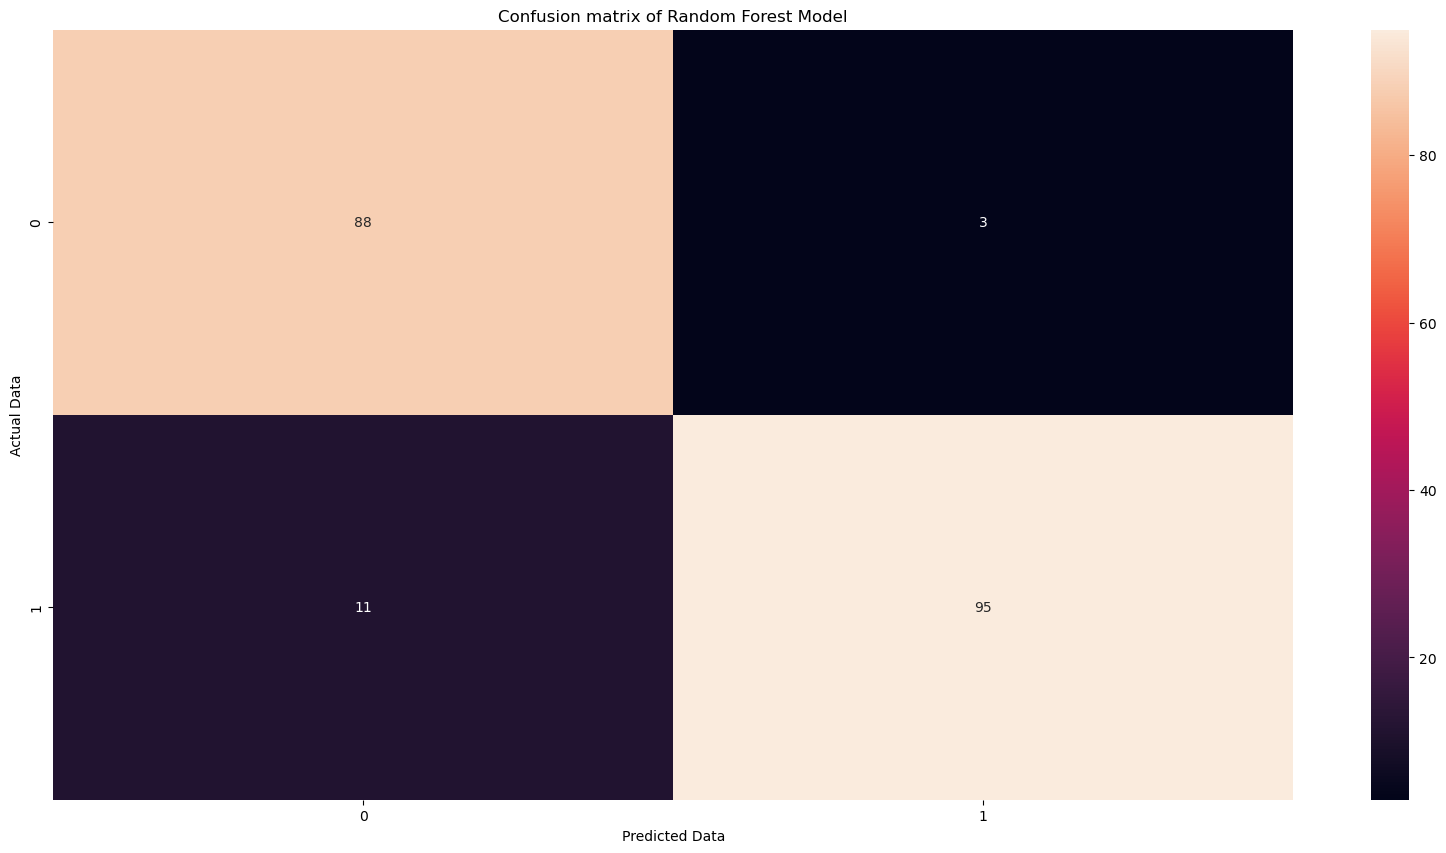

In [88]:
#Get the confusion matrix
cf_matrix_r = confusion_matrix(y_test, y_predr)
sns.heatmap(cf_matrix_r, annot=True)
plt.title("Confusion matrix of Random Forest Model")
plt.xlabel("Predicted Data")
plt.ylabel("Actual Data")
plt.show()

In [102]:
scores = { 'LogisticRegression' : [f1_score,pre_score,round(recall_score,4)],
            'RandomForest' : [f1_score_r,pre_score_r,recall_score_r]}

scores_df = pd.DataFrame(scores, index = ["f1_score",'precision_score','recall_score'])
print(scores_df)

                 LogisticRegression  RandomForest
f1_score                    0.92233      0.931373
precision_score             0.95000      0.969388
recall_score                0.89600      0.896226


In [ ]:
#insights:
# data is highly imbalanced, so it needs to be undersampling or oversampling technique.
# i choose to do undersampling technique to balance the data
# high precision score indicates that the model is good at identifying positive examples, where the target variable is 1.
# high recall score indicates that the model is good at identifying positive examples, where the target variable is 0.
# high f1 score is also showing that the model is good at identifying positive and negative examples.